# DATA*6100 Project-1 Ames Housing Sale Price Prediction Dataset

# Under the guidance of Prof. Mihai Nica
# Student: Santosh Kumar Satapathy

# Executive Summary

In this DATA*6100 project, we will be running tests on Ames Housing Dataset to predict House Sale Price on the test set and minimise the RMSE. We will be using Linear Regression Model to predict the sale prices. In order to tune our prediction model, we will be playing around with the dataset to figure out how we can train the best performing Regression Model and how we can achieve the same. We will also take you through how we decided whether the actions we are performing are improving our prediction or not. In the end we will select the best performing model upon performing Cross Validation on our training dataset.

What is Cross Validation?

Cross Validation in layman terms, is the process of testing our model on our whole training dataset by dividing the dataset into k-folds and testing the model 'k' times by keeping k'th fold as Validation Set and rest as Training set for each fold. Then, we take the mean of the error score on each fold which ensures that our model is adaptive and has not been tightly overfit to our training data. In other words, the model has not "memorised" the training data and highly probably perform well on Test Data,

k-fold Cross Validation helps us judge how flexible our model is and hence we will be relying on maximising the score on the k-fold cross validation.

Below, we have a sketch(fetched from a link from a blog of Zitao Shen) demonstrating Cross Validation and the term 'Performance' is referring to the error score.


![](https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/featured_hubbc3c90efda00133c9815a673162bf54_130575_720x0_resize_lanczos_2.png)

How is Cross Validaton Error Score Calculated?

Cross Validation Error is calculated by taking mean of Predicted minus Actual Sale Price on the Validation Set for each Fold.

Now, that we understand how Cross Validation works, because our Final Model is based on it, we will be doing the following analysis/tests on our model sequentially to learn about our dataset and what operation we can perform to improve our results:
<ol>
 <li><Strong>Impute missing values in the dataset:</Strong> We used Mean, Mode and Extracting NULL values as seperate features entirely. We tested the RMSE on trying each method and finally decided that, for Categorical Features, we will create a New Feature for 'null' values and for numerical featues, we will take the mean of the given values. </li>
 <li><Strong>Categorical Feature Encoding:</Strong> We will use One Hot Encoder to encode categorical features including features like 'Year'</li>
 <li><Strong>Understanding the Correlation matrix:</Strong> To find how each feature is correlated with the Label, we can draw correlation matrix, but it is not as efficient in selecting features for our model as Forward and Backward Selection. Given that on adding or removing featues one by one and testing RMSE each time, we are automatically taking care of the relation between features. For example, if two features are correlated, I add one feature to my model in forward selection, it will automatically nullify the effect of the other feature when I will attempt to add a second feature. </li>
 <li><Strong>Feature Scaling:</Strong> We tested scaling all features and labels to improve processing time and measure its effect. In this dataset specifically, we could not observe any measurable impact of scaling the features. The results on the RMSE were nearly identicial if we scaled or not. Maybe, this is because our sample size is too small and in the real world datasets, it will have a signifacant impact. </li>
 <li><Strong>Testing Models:</Strong> To learn about different models and which model suits our dataset and which we should be using.
 <li><Strong>Measure RMSE:</Strong> Measure RMSE on Training set and Validation set to measure underfitting and overfitting. </li>
 <li><Strong>Train Test Split:</Strong> To extract Validation Set for testing </li>
 <li><Strong>Feature Selection:</Strong> Building Forward Selection and Backward selection model for feature selection for the final model </li>
 <li><Strong>Outlier detection:</Strong> We looked for outliers using the LocalOutlierFactor as taught in the Data*6200 class. We also tried other methods on our own and had suspicion on around 40 outliers. But, we could not find any sufficient evidence after digging deep to support why those outliers should be removed and not kept. So we kept the outliers while training our model as well. </li>
 <li><Strong>Cross Validation:</Strong> Performing K-Fold cross validation on the entire dataset to measure model accuracy as demonstrated above.  </li>
    </ol>
    
<Strong>What else we could have done: </Strong>
<ol>
 <li>We could have tried to measure the F-statistic, T-statistic metrics while performing each iteration in our Forward Selection Model. That although would be too intensive computationally but we can draw certain conclusions from a few interations as well. </li>
 <li>We could try to measure Adjusted R2. We were not able to perform this due to deadline restrictions but it would surely give us more insights. </li>
</ol>

<Strong>Final Approach Selection Criteria:</Strong>
We will perform pre-processing and observe what needs to be done. Once the dataset is ready, we will try to select features using Forward Selection Model while minimising the RMSE on the Training Data itself. Once we observe how our graph saturates on doing this, we will run a Backward Selection Model.

In that Backward Selection Model, we will try to remove features one by one. BUT, please note that we will not be testing the RMSE on the Training Data this time.

<Strong> Since in the Forward Selection Model, we already tried to minimise the Training RMSE, which means, we have very tightly fit our model to our training data, GOOD(not really)!</Strong> 

<Strong> No, it is now probably OVERFIT, to remove this overfitting, we will run a backward selection model WHILE MAXIMISING THE CROSS VALIDATION SCORE instead of minimising the RMSE. We will see this in the Model Fitting Section, right before Overfitting vs Underfitting Demo.</Strong> 

<Strong> This would help ensure that after tightly overfitting the model on training data, we set it a little loose but removing features based on Cross Validation.</Strong>

Once we have tested the AIC/BIC curves, we will know have many features to use and what to use in the Final Model.

Lets Start!

Note:
THE OUTPUT OF THIS MODEL IS FED IN THE LEADERBOARD WITH THE NAME : Santoshtest and RMSE: 20009

# Data Pre-Processing

We will start with reading the data, understanding it thoroughly and perform preprocessing and cleaning as and when required in the dataset.

**Importing the model** and storing the data in Pandas DataFrame named "df"

Note: We will be using this and other upcoming variable names throughout this notebook.

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/housingcsv/Housing_Train.csv')

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log10_SalePrice
0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Normal,141000,5.149219
1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,110000,5.041393
2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,Normal,167900,5.225051
3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,6,2006,WD,Family,118000,5.071882
4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,281213,5.449035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,912,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,143500,5.156852
996,916,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2007,WD,Normal,75000,4.875061
997,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000,4.826075
998,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,127000,5.103804


Note: Upon reading the data description, we realise that "Id" is only a row marking column and we should remove it from our feature set. Also, we are removing "log10_SalePrice" as we will be predicting "SalePrice".

In [2]:
del df['Id']
del df['log10_SalePrice']

Now we will try to plot a histogram that will show us how each numerical feature is distributed.

Labels:
X-Label denotes a numerical value in the Feature
Y-Label denotes the count of occurance of that value

Note: We have not added labels in the histograms below to save space.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

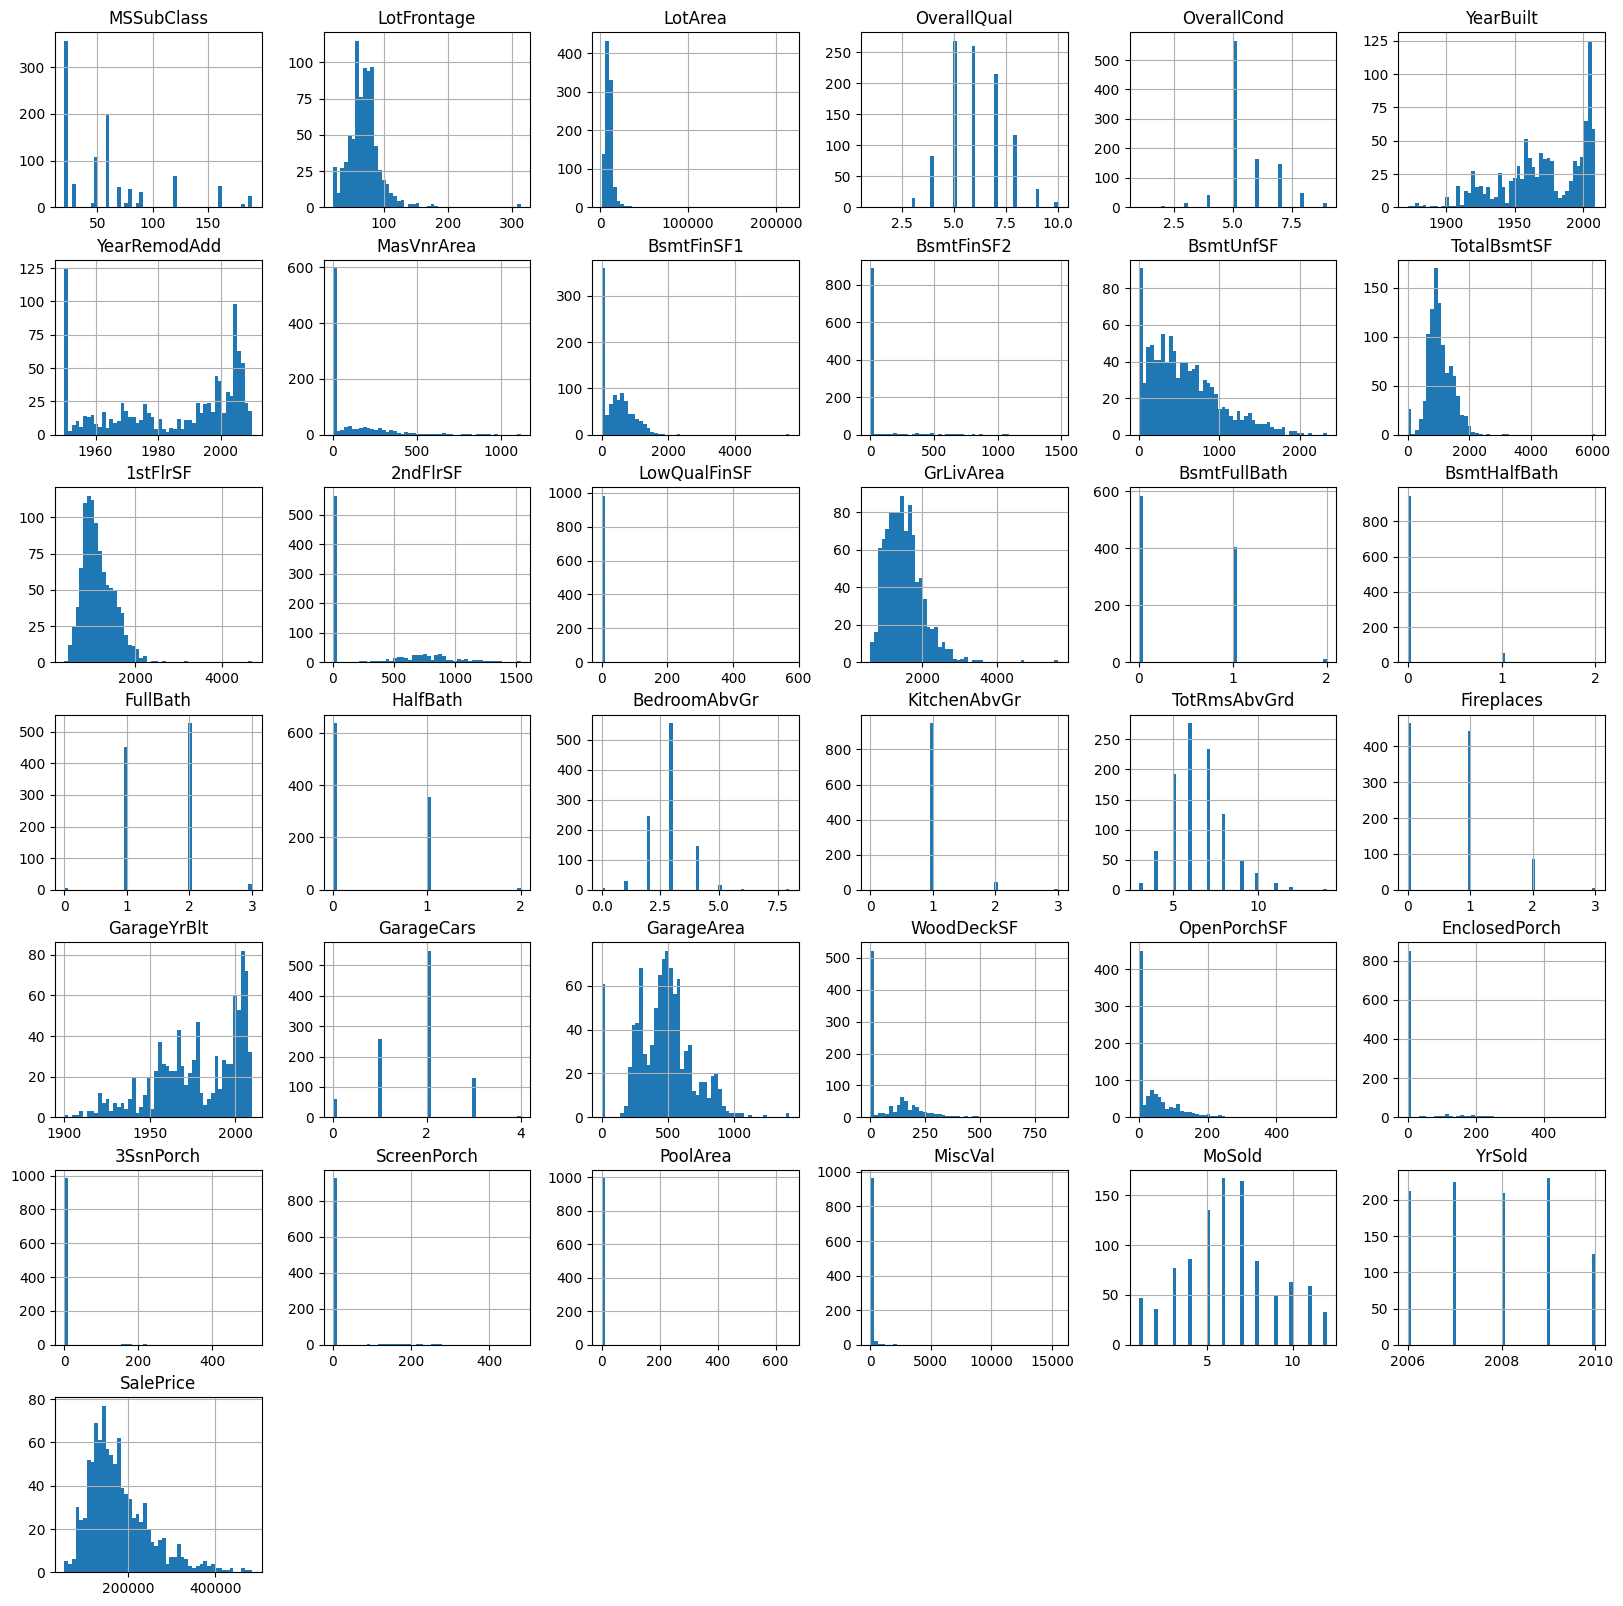

In [3]:
df.hist(bins=50, figsize=(20, 20))

Looking at the histograms of each feature, we understand that **certains features are categorical, some have missing data and some are heavily skewed.**

After reading the data description to understand the meaning of each feature, we also check the unique values in the each feature below and its distribution in the above histograms.

MSSubClass = [ 20  50  60  30  80 160 190 120  45  90  85  70 180  75]
Axes(0.125,0.11;0.775x0.77)
MSZoning = ['RL' 'RM' 'FV' 'C (all)' 'RH']
Axes(0.125,0.11;0.775x0.77)
LotFrontage = [ 63.  nan  80.  75.  88.  84.  86.  76.  65.  82.  21.  60.  92. 107.
  42.  62. 105.  32.  77.  73.  99.  52. 100.  53.  78.  64.  40.  51.
  50.  68.  79.  70. 313.  30.  66.  74.  55.  35. 111. 141.  67.  69.
  89. 130. 120. 140.  95.  72.  43.  83.  85.  94. 149.  24.  81.  49.
 144. 108. 110. 129.  44.  34.  41.  58.  91.  90.  71. 118.  57.  54.
  56. 104. 102.  93.  45.  96. 103.  98. 109.  87.  59.  36.  33.  38.
  61. 150. 115. 128. 168.  47. 114. 124.  37. 101.  97. 121. 153. 152.
 182. 122.  39. 174. 116. 106.  46.]
Axes(0.125,0.11;0.775x0.77)
LotArea = [  7500   7015   9650   9000  12665  11340  11210   9880  10237  11287
   1680   6600  11932   8775  11096   8471  13891   3964  10106   8892
   8470   4500   9320   8760  11851  10304   9600  10125   6240   4438
  21750   3982   4435  11645   

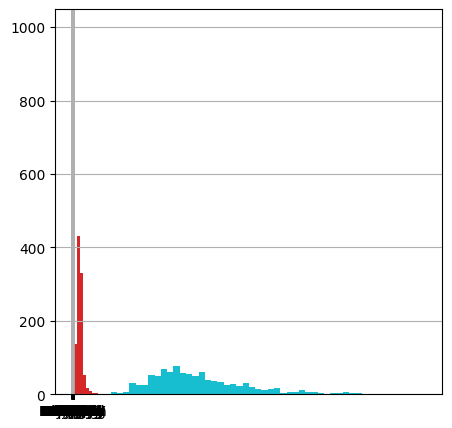

In [4]:
# We run a for loop for each feature, printing its unique values and drawing its histogram
for i in df.columns:
    print('{} = {}'.format(i,df[i].unique(),end='/n'))
    print(df[i].hist(bins=50, figsize=(5,5)))

**Note:** In the above histogram, you are seeing all the histrograms mapped one over the other. While studying the data, I had looked at each feature's unique values and its histogram one by one. You can put a wait statement in the above for-loop to pause at each column.

Now we start by running a for-loop on each column, checking how many values (in percentage) are missing below:

In [5]:
for i in df.columns:
    if (len(df[df[i].isnull()].index)/len(df.index)*100>0):
        print(i+"  :  "+str(len(df[df[i].isnull()].index)/len(df.index)*100))

LotFrontage  :  18.6
Alley  :  93.4
MasVnrType  :  59.599999999999994
MasVnrArea  :  0.6
BsmtQual  :  2.5
BsmtCond  :  2.5
BsmtExposure  :  2.6
BsmtFinType1  :  2.5
BsmtFinType2  :  2.6
Electrical  :  0.1
FireplaceQu  :  46.5
GarageType  :  6.1
GarageYrBlt  :  6.1
GarageFinish  :  6.1
GarageQual  :  6.1
GarageCond  :  6.1
PoolQC  :  99.5
Fence  :  81.5
MiscFeature  :  96.39999999999999


We see that certain columns have more than 80% missing values. However, upon inspection, we have observed that either the best performing solution was to convert NULL values of Categorical Features to New Feature representing the absence of value in the base feature. Also, after a careful inspection of the data description, we have decided that we will be encoding certain categorical features using **OneHotEncoder** from sklearn library. This encoder encodes categorical columns. Lets see how this works:

In [6]:
# Import OneHotEncoder from sklearn.preprocessing tools and initiate an instance named "enc"
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

This is the list of features that we have decided after going through the description, that are categorical and we are going to encode them.

**Note: We are also encoding features that represent YEARS.** Features that might be numerical, like YEARS, should rather be considered categorical and hence we are encoding it as the model will better evaluate its slopes for each individual year rather than trying to draw a linear correlation betweeon 1990 and 1991, for example.

In [7]:
list_of_columns = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                   'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','GarageYrBlt',
                   'MiscFeature','SaleType','SaleCondition','YearBuilt','YearRemodAdd','YrSold','LotShape','Utilities','LandSlope','ExterQual','ExterCond',
                   'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','CentralAir','Functional','FireplaceQu','GarageQual',
                   'GarageCond','PoolQC','GarageFinish','PavedDrive','Fence'
                  ]

We will now encode these features:

In [8]:
# We run enc.fit_transform function on each feature to expand it into arrays for each unique value of that feature.

# Using enc.get_feature_names_out, we can fetch the feature name for each array generated in the above step.

# We will map each expanded feature array to its name and join that array to our original dataframe. We will keep deleting the original encoded feature.

for i in list_of_columns:
    # Applying fit_transform, and saving the arrays in a dataframe
    a = pd.DataFrame(enc.fit_transform(df[[i]]).toarray())
    # Mapping each column's names
    a.columns = enc.get_feature_names_out()
    #Joining to original dataframe
    df = df.join(a)
    #Removing original feature
    del df[i]


For example, Fence feature is expanded into 5 arrays, we have mapped each array after prefixing its name with "Fence_". **Note that NULL values are also getting encoded as a new feature. We are going to compare encoding NULL as a feature with imputing NULL values with mean and mode.**

In [9]:
a

,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,0.0,1.0


Now we will recheck how many features with NULL values are left:

In [10]:
for i in df.columns:
    if (len(df[df[i].isnull()].index)/len(df.index)*100>0):
        print(i+"  :  "+str(len(df[df[i].isnull()].index)/len(df.index)*100))

LotFrontage  :  18.6
MasVnrArea  :  0.6


As we were discussing before, the NULL values of Categorical Columns are now New Features themselves and now we are only left with two numerical features. 

Given only LotFrontage is somewhat significant in regards to having NULL values, we will fill it with their means as it was better performing that mode: 

In [11]:
import numpy as np

for i in df.columns:
    if (len(df[df[i].isnull()].index)/len(df.index)*100>0):
        try:
            df[i] = np.where(df[i].isnull(),df[df[i].notnull()][i].mean(),df[i])
        except:
            df[i] = np.where(df[i].isnull(),df[df[i].notnull()][i].mode()[0],df[i])

# Modelling and Model Tuning

Now, given we are done with pre-processing, time to start building a model. Below cell, which was doubtful in the previous draft, is essentially us building a base model on the prepared dataset without doing anything. 

This will give us a idea what are we dealing with. We need to know where we being with.

Lets build a most basic linear regression model below:

In [12]:
# Import LinearReression model from sklearn
from sklearn.linear_model import LinearRegression
# Import train_test_split to create validation set
from sklearn.model_selection import train_test_split
# Import mean_squared_error and r2_score function for measurement
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import our basis libraries
import pandas as pd
import numpy as np
import math

# X is our features
X = df.drop(columns=['SalePrice'])
# Y is our label
Y = df['SalePrice']

# We split X and Y into training set(800 rows) and validation set(200 rows) 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

# We create an instance of LinearRegression model named clf, short for classifier
clf = LinearRegression()

# We fit the model without tuning any parameters for our base run
clf.fit(X_train,Y_train)

# We measure the accuracy on the validation set, by measuring the RMSE by taking root of MSE using the mean_squared_error function, measuring the R2 score from the r2_score library
rmse = (np.sqrt(mean_squared_error(Y_test, clf.predict(X_test))))
r2 = r2_score(Y_test, clf.predict(X_test))
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

# We import cross_val_score to run cross validation on our model
from sklearn.model_selection import cross_val_score

# We run 5-fold cross validation
print(cross_val_score(clf, X, Y, cv=5).mean())


Testing performance
RMSE: 678531690.39
R2: -81089422.83
-16217884.20332537


Now we have seen how to build a Linear Regression Model in Python.

But, we also see that our model does not work as our RMSE, R2 and Cross Validation Score are not making sense and hence we begin tuning our model.

Let's try to build a **Forward Feature Selection Model**

We will start with 0 features, add 1 feature one by one for each feature and test the RMSE on the train set itself.

Once the loop is over, we know adding which feature minimised the RMSE(training data) the most, so we add that feature and repeat the process on and on until we feel that the RMSE is not decreasing significantly now.

In [15]:
# FORWARD FEATURE SELECTION

# We are creating a prediction function that can take input as features and returns Train RMSE of the model upon adding that feature to our starting model, that is with 0 features.
def pred(features):
        # If the model has tested and selected features already, add the new feature to the existing list and test RMSE 
        if len(score_results)!=0:
            n_features = score_results.copy()
            n_features.extend([features])
            X = df[n_features]
        
        # If the model has just started, make the model with only the input feature
        else:
            X = df[[features]]

        Y = df['SalePrice']
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)
        clf = LinearRegression()

        # Try to fit the model with the list of features, or if the new feature cannot allow the Linear Regression model fit, ignore that feature
        try:
            clf.fit(X,Y)
            return math.ceil(np.sqrt(np.mean(np.power((clf.predict(X)-np.array(Y)),2))))
        except:
            print("####### IGNORED ####### : "+features)
        del X
        del Y

# score_results is the list that would store that base list of features that have a significant impact on the RMSE of the model. In each interation we will keep adding one feature to this list
# We have fetched the list of top 100 columns below, as this loop takes time to fetch results

# score_results = []
score_results = ['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'Condition2_PosN', 'MSSubClass', 'SaleType_New', 'BsmtExposure_Gd', 'ExterQual_TA', 'KitchenQual_Ex', 'LotArea', 'OverallCond', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'YearBuilt_1892', 'Neighborhood_StoneBr', 'Foundation_BrkTil', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'WoodDeckSF', 'SaleCondition_Normal', 'Functional_Typ', 'Condition1_Norm', 'Fireplaces', 'YearBuilt_2008', 'HeatingQC_Ex', 'LotConfig_CulDSac', 'BsmtExposure_No', 'TotalBsmtSF', 'Neighborhood_Veenker', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'FireplaceQu_Gd', 'YrSold_2008', 'GarageYrBlt_2006.0', 'YearBuilt_2006', 'YearBuilt_1932', 'Condition1_RRAe', 'ScreenPorch', 'Electrical_nan', 'Neighborhood_SawyerW', 'RoofMatl_WdShngl', 'GarageYrBlt_1934.0', 'YearBuilt_1935', 'GarageYrBlt_1963.0', 'BsmtFullBath', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'YearRemodAdd_2002', 'SaleType_CWD', 'MSZoning_RL', 'LotShape_IR1', 'GarageYrBlt_nan', 'Exterior1st_MetalSd', 'Heating_OthW', 'GarageType_2Types', 'HouseStyle_2Story', 'GarageArea', 'GarageFinish_Fin', 'YearBuilt_1984', 'FireplaceQu_Ex', 'GarageYrBlt_1900.0', 'Condition1_Artery', 'YearBuilt_1913', 'GarageYrBlt_1973.0', 'YearRemodAdd_1977', 'YearBuilt_1898', 'HouseStyle_2.5Fin', 'ExterCond_Gd', 'HeatingQC_Fa', 'Exterior1st_VinylSd', 'LotShape_IR3', 'Neighborhood_ClearCr', 'MasVnrType_BrkFace', 'YearBuilt_1995', 'YearRemodAdd_1969', 'YearBuilt_1910', 'BldgType_2fmCon', 'YearBuilt_1953', 'GarageYrBlt_1922.0', 'GarageCond_Fa', 'LandContour_Bnk', 'SaleType_Con', 'GarageYrBlt_1923.0', 'GarageYrBlt_2008.0', 'YearBuilt_1916', 'HouseStyle_SLvl', 'YearBuilt_1925', 'Exterior1st_Stucco', 'BsmtFinType2_GLQ', 'Neighborhood_NPkVill', 'Neighborhood_BrDale', 'Exterior2nd_CmentBd', 'Exterior1st_CemntBd', 'Neighborhood_Blmngtn', 'GarageYrBlt_1978.0', 'YearBuilt_1957', 'YearRemodAdd_1997', 'Utilities_AllPub', 'BsmtFinType2_Rec', 'LandSlope_Sev', 'GarageYrBlt_2003.0', 'YearRemodAdd_1999', 'RoofMatl_CompShg', 'YearRemodAdd_1987', 'Functional_Maj2', 'BsmtCond_Po', 'PoolQC_Gd', 'LotConfig_Corner', 'GarageYrBlt_1915.0', 'RoofStyle_Gambrel', 'LotConfig_Inside', 'YearRemodAdd_1985', 'YearBuilt_1991', 'YearRemodAdd_1975', 'YearRemodAdd_1955', 'GarageYrBlt_1977.0', 'YearBuilt_1890', 'SaleCondition_Partial', 'BsmtFinSF2', 'Fence_GdPrv', 'Electrical_Mix', 'GarageYrBlt_2005.0', 'GarageYrBlt_2004.0', 'YearBuilt_2004', 'YearBuilt_2009', 'Electrical_FuseF', 'GarageYrBlt_1945.0', 'Exterior2nd_Stucco', 'GarageYrBlt_1918.0', 'Exterior1st_WdShing', 'Exterior2nd_Wd Shng', 'YearRemodAdd_1959', 'YearRemodAdd_1950', 'YearBuilt_1965', 'GarageYrBlt_1970.0', 'YearRemodAdd_1958', 'YrSold_2009', 'LandContour_Low', 'GarageYrBlt_2001.0', 'GarageYrBlt_1961.0', 'YearRemodAdd_1960', 'YearBuilt_1989', 'GarageYrBlt_1910.0', 'GarageQual_Po', 'YearBuilt_1955', 'GarageYrBlt_1935.0', 'YearRemodAdd_1966', 'BsmtFinType1_ALQ', 'YearRemodAdd_1988', 'HeatingQC_Gd', 'YearBuilt_1936', 'HouseStyle_1.5Unf', 'GarageYrBlt_1982.0', 'Condition1_Feedr', 'FireplaceQu_nan', 'YearBuilt_1956', 'YearBuilt_1906', 'GarageYrBlt_1988.0', 'GarageYrBlt_1920.0', 'LotConfig_FR2', 'GarageYrBlt_1998.0', 'LandContour_HLS', 'BsmtFinType1_Unf', 'BsmtFinType1_nan', 'YearRemodAdd_1982', 'PavedDrive_Y', 'Exterior1st_BrkComm', 'YearBuilt_1922', 'GarageYrBlt_1925.0', 'BsmtFinType1_GLQ', 'GarageYrBlt_1965.0', 'Exterior2nd_Plywood', 'Fence_nan', 'YearBuilt_1988', 'YearRemodAdd_1951', 'YearBuilt_1951', 'GarageYrBlt_1951.0', 'HalfBath', 'EnclosedPorch', 'YearBuilt_1924', 'Neighborhood_Timber', 'FireplaceQu_Fa', 'BldgType_TwnhsE', 'MSZoning_C (all)', 'YearRemodAdd_1952', 'YearBuilt_2007', 'GarageYrBlt_2009.0', 'YearRemodAdd_2010', 'RoofMatl_Metal', 'GarageYrBlt_2000.0', 'YearBuilt_1921', 'GarageYrBlt_1992.0', 'Exterior2nd_ImStucc', 'GarageYrBlt_1971.0', 'Exterior1st_ImStucc', 'YearBuilt_1992', 'YearRemodAdd_1993', 'GarageQual_TA', 'GarageCond_Po', 'HouseStyle_SFoyer', 'YearBuilt_1982', 'Street_Pave', 'SaleCondition_Alloca', 'LotFrontage', 'YearBuilt_1971', 'PoolQC_nan', 'GarageYrBlt_1990.0', '3SsnPorch', 'GarageYrBlt_1997.0', 'BsmtFinType2_Unf', 'YearRemodAdd_1989', 'Foundation_Wood', 'YearBuilt_1977', 'YearRemodAdd_1978', 'YearRemodAdd_1963', 'Exterior2nd_Other', 'MasVnrType_Stone', 'YearBuilt_1990', 'LandSlope_Gtl', 'YearBuilt_1929', 'Exterior2nd_BrkFace', 'YearBuilt_1959', 'YearBuilt_1997', 'RoofMatl_Tar&Grv', 'GarageYrBlt_1981.0', 'GarageYrBlt_1980.0', 'YearRemodAdd_1990', 'Alley_Grvl', 'Exterior1st_Plywood', 'GarageYrBlt_1914.0', 'YearBuilt_1914', 'GarageYrBlt_1927.0', 'YrSold_2010', 'Exterior2nd_Brk Cmn', 'YearBuilt_1985', 'GarageYrBlt_1985.0', 'HouseStyle_1Story', 'YearBuilt_1927', 'GarageYrBlt_1928.0', 'YearBuilt_1928', 'SaleCondition_Family', 'GarageYrBlt_1929.0', 'GarageYrBlt_1956.0', 'GarageYrBlt_1916.0', 'CentralAir_Y', 'GarageYrBlt_1957.0', 'YearBuilt_1875', 'Neighborhood_BrkSide']

# Max RMSE will store that best RMSE score we have been able to reach till now, we will set it at default 70000 for starting
max_rmse = 70000

# Can be ignored, just a full list of features
top = df.columns

for j in range(len(df.columns)):
    test = []
    for i in top:
        if i != 'SalePrice' and i not in score_results:
            test.append([i,pred(i)])
    if int((pd.DataFrame(test).sort_values(by=[1],ascending=True)).reset_index(drop=True).loc[0,1]) < int(max_rmse):
        score_results.append((pd.DataFrame(test).sort_values(by=[1],ascending=True)).reset_index(drop=True).loc[0,0])
        temp = pd.DataFrame(test).sort_values(by=[1],ascending=True)
#         top = temp[:50][0]
        max_rmse = (pd.DataFrame(test).sort_values(by=[1],ascending=True)).reset_index(drop=True).loc[0,1]
        print(score_results)
        print((pd.DataFrame(test).sort_values(by=[1],ascending=True)).reset_index(drop=True))
        break;
    else:
        break;

['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'Condition2_PosN', 'MSSubClass', 'SaleType_New', 'BsmtExposure_Gd', 'ExterQual_TA', 'KitchenQual_Ex', 'LotArea', 'OverallCond', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'YearBuilt_1892', 'Neighborhood_StoneBr', 'Foundation_BrkTil', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'WoodDeckSF', 'SaleCondition_Normal', 'Functional_Typ', 'Condition1_Norm', 'Fireplaces', 'YearBuilt_2008', 'HeatingQC_Ex', 'LotConfig_CulDSac', 'BsmtExposure_No', 'TotalBsmtSF', 'Neighborhood_Veenker', 'Exterior2nd_VinylSd', 'ExterQual_Ex', 'FireplaceQu_Gd', 'YrSold_2008', 'GarageYrBlt_2006.0', 'YearBuilt_2006', 'YearBuilt_1932', 'Condition1_RRAe', 'ScreenPorch', 'Electrical_nan', 'Neighborhood_SawyerW', 'RoofMatl_WdShngl', 'GarageYrBlt_1934.0', 'YearBuilt_1935', 'GarageYrBlt_1963.0', 'BsmtFullBath', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'YearRe

Above, in the output, you can see that we have selected upto top 175 Features that kept decreasing our RMSE on Training Data, that means fitting the model tighter and tighter and we can also see that it keeps going down on and on.

<Strong> Now, we will plot the curve to see how our Cross Validation Score decreases while we add the above 250 features in a sequence. </Strong>

<Strong> THE CONCEPT OF DEMOSTRATING UNDERFITTING VS OVERFITTING STARTS FROM RIGHT HERE! </Strong>

Text(0, 0.5, 'Cross Validation Score')

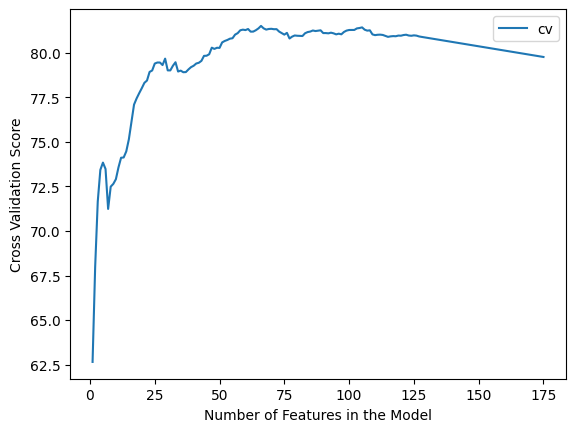

In [5]:
check = pd.DataFrame(columns=['cv'])
for i in range(len(score_results)):
    if i > 0: 
        X_train, X_test, Y_train, Y_test = train_test_split(df[score_results[:i]],df['SalePrice'],test_size=0.2,shuffle=False)

        clf = LinearRegression()
        clf.fit(df[score_results[:i]],df['SalePrice'])
        check.loc[i] = [cross_val_score(clf, df[score_results[:i]],df['SalePrice'], cv = 5).mean()*100]
        
ax = check[check['cv']>0].plot()

ax.set_xlabel('Number of Features in the Model')
ax.set_ylabel('Cross Validation Score')

As we keep on adding more and more features, that Cross Validation Score keeps increasing and saturates by around 60-120 features.

Now, we will build a **Backward Selection Model** to remove removable features from our above Forward Selected List using these 120.

If we observe that our Cross Validation Score can increaase on removing some features, we will remove them:

In [6]:
# This score_results stores our list of features from Forward Selected Model
score_results = score_results[:120]
# We will fetch the features upon removing which, our Cross Validation Score increases on the whole dataset, we have already selected certain such features after running this mode

back = ['Condition2_PosN', 'BsmtFinSF1', 'TotalBsmtSF', 'LandSlope_Sev', 'LotArea', 'LotShape_IR3', 'GarageArea', 'YearBuilt_2008', 'GarageYrBlt_2008.0', 'ExterQual_Ex', 'HouseStyle_2.5Fin', 'SaleCondition_Normal', 'BsmtFinType2_Rec', 'Condition1_Artery', 'HouseStyle_2Story', 'Neighborhood_Veenker', 'YearRemodAdd_1977', 'YearRemodAdd_1969', 'HeatingQC_Fa', 'Exterior1st_Stucco', 'Functional_Maj2', 'Heating_OthW', 'GarageYrBlt_2003.0', 'LotConfig_Corner', 'LotConfig_Inside', 'RoofMatl_CompShg', 'YearRemodAdd_1985', 'YearBuilt_1898', 'BsmtCond_Po', 'MasVnrType_BrkFace', 'BsmtFinType2_GLQ', 'Neighborhood_NPkVill', 'YrSold_2008', 'FireplaceQu_Gd', 'YearBuilt_1957', 'YearBuilt_1913', 'GarageYrBlt_1915.0']
# back = ['RoofMatl_ClyTile', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageYrBlt_2009.0', 'Condition1_Norm', 'Neighborhood_ClearCr', 'RoofMatl_Tar&Grv', 'LandSlope_Sev', 'GarageYrBlt_2008.0', 'Foundation_Wood', 'YearBuilt_2008', 'MasVnrType_Stone', 'CentralAir_Y', 'HouseStyle_2.5Fin', 'Exterior2nd_Stucco', 'LotShape_IR3', 'LandContour_Low', 'Exterior1st_Stucco', 'ExterQual_Ex', 'SaleCondition_Normal', 'LotFrontage', 'YearRemodAdd_1993', 'GarageYrBlt_1945.0', 'SaleCondition_Alloca', 'GarageYrBlt_1918.0', 'HeatingQC_Fa', 'YearBuilt_1989', 'Exterior1st_VinylSd', 'Street_Pave', 'GarageArea', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'BsmtFinType2_Rec', 'YearBuilt_1927', 'GarageYrBlt_1910.0', 'ExterCond_Gd', 'Neighborhood_OldTown', 'YearRemodAdd_1977', 'MSZoning_RL', 'Fence_GdPrv', 'BsmtQual_Gd', 'Heating_OthW', 'YearBuilt_1982', 'GarageQual_Po', 'YearBuilt_1898', 'YrSold_2010', 'Neighborhood_NPkVill', 'FireplaceQu_Fa', 'YearRemodAdd_1978', 'YearBuilt_1971', 'MasVnrType_BrkFace', 'Electrical_nan', 'YearRemodAdd_1990']

back_df = pd.DataFrame(columns=['cv'],index=score_results)

for i in range(len(score_results)):
    for i in score_results:
        if i not in back:
            X = df[score_results].drop(columns=back).drop(columns=[i])
            Y = df['SalePrice']
            clf = LinearRegression()
            clf.fit(X,Y)
            back_df.loc[i] = cross_val_score(clf, X, Y, cv=5).mean()

    back.append(back_df.sort_values(by=['cv'],ascending=False).index[0])
    print(back)
    print(back_df.sort_values(by=['cv'],ascending=False)['cv'][0]*100)
    break;

['Condition2_PosN', 'BsmtFinSF1', 'TotalBsmtSF', 'LandSlope_Sev', 'LotArea', 'LotShape_IR3', 'GarageArea', 'YearBuilt_2008', 'GarageYrBlt_2008.0', 'ExterQual_Ex', 'HouseStyle_2.5Fin', 'SaleCondition_Normal', 'BsmtFinType2_Rec', 'Condition1_Artery', 'HouseStyle_2Story', 'Neighborhood_Veenker', 'YearRemodAdd_1977', 'YearRemodAdd_1969', 'HeatingQC_Fa', 'Exterior1st_Stucco', 'Functional_Maj2', 'Heating_OthW', 'GarageYrBlt_2003.0', 'LotConfig_Corner', 'LotConfig_Inside', 'RoofMatl_CompShg', 'YearRemodAdd_1985', 'YearBuilt_1898', 'BsmtCond_Po', 'MasVnrType_BrkFace', 'BsmtFinType2_GLQ', 'Neighborhood_NPkVill', 'YrSold_2008', 'FireplaceQu_Gd', 'YearBuilt_1957', 'YearBuilt_1913', 'GarageYrBlt_1915.0', 'ExterCond_Gd']
86.54659585101895


The output you see above is the features that we are removing after running Backward Selection Model based on Cross Validation to remove overfitting.

After selecting the **Features from the Forward Selection Model** that increase our Train RMSE, and selecting a little more features that required

And after removing the **Features from the previous output, using the Backward Selection Model**, that removes the features that increase our Cross Validation Score after Removal:

We will test our model for RMSE and Cross Validation Score and we will also try some other Linear Regression Models on our models and compare below:

In [7]:
# Create an instance of the model, train it and print its RMSE and 5-Fold Cross Validation Score
clf = LinearRegression()
clf.fit(df.drop(columns=['SalePrice']),df['SalePrice'])
print('Linear RMSE = '+str(math.ceil(np.sqrt(np.mean(np.power((clf.predict(df.drop(columns=['SalePrice']))-np.array(df['SalePrice'])),2))))))
print('Linear CV Score = '+ str(cross_val_score(clf,df.drop(columns=['SalePrice']),df['SalePrice'], cv=5).mean()*100),end='\n\n')

Linear RMSE = 15557
Linear CV Score = -1621788420.332537



We can see that in our basic model, the Linear Regression RMSE is 15557, but the 5-Fold Cross Validation Fails, which means that the model is not fit.

Let's test out model with only using features from the Forward Selection Model and compare:

In [13]:
clf = LinearRegression()
clf.fit(df[score_results],df['SalePrice'])
print('Linear RMSE = '+str(math.ceil(np.sqrt(np.mean(np.power((clf.predict(df[score_results])-np.array(df['SalePrice'])),2))))))
print('Linear CV Score = '+ str(cross_val_score(clf,df[score_results],df['SalePrice'], cv=5).mean()*100),end='\n\n')

Linear RMSE = 17725
Linear CV Score = 80.96010910605749



We can see that Cross Validation Score is roughly 80% on our model after Forward Selection trying to Maximise RMSE on Train Data.

Let's run this after removing the Features selected from the Backward Selection Model:

In [14]:
clf = LinearRegression()
clf.fit(df[score_results].drop(columns=back),df['SalePrice'])
print('Linear RMSE = '+str(math.ceil(np.sqrt(np.mean(np.power((clf.predict(df[score_results].drop(columns=back))-np.array(df['SalePrice'])),2))))))
print('Linear CV Score = '+ str(cross_val_score(clf,df[score_results].drop(columns=back),df['SalePrice'], cv=5).mean()*100),end='\n\n')

Linear RMSE = 20717
Linear CV Score = 86.54659585101895



Now, we can see that our RMSE is little higher, but gives an accurate Cross Validation Score, which means that now **our model is predicting well with 86.5% accuracy on 5-Fold of Training Data**

Now we can, test these models on the Testing Dataset and check our model's performance.

# Demonstration of Overfitting vs Underfitting

As we demostrated above, that as we kept adding features, the Training Data RMSE kept going lower but it also lead to Overfitting.

To visualise this, what can do now, is while we were running Forward Selection Model, we can run the same model again, checking how train and test RMSE behave as we add more and more features to our model:

In [42]:
check = pd.DataFrame(columns=['train_rmse','test_rmse'])
for i in range(len(score_results)):
    if i > 0: 
        X_train, X_test, Y_train, Y_test = train_test_split(df[score_results[:i]],df['SalePrice'],test_size=0.2,shuffle=False)

        clf = LinearRegression()
        clf.fit(X_train,Y_train)
        check.loc[i] = [math.ceil(np.sqrt(np.mean(np.power((clf.predict(X_train)-np.array(Y_train)),2)))), math.ceil(np.sqrt(np.mean(np.power((clf.predict(X_test)-np.array(Y_test)),2))))]

Text(0, 0.5, 'RMSE on Training Data')

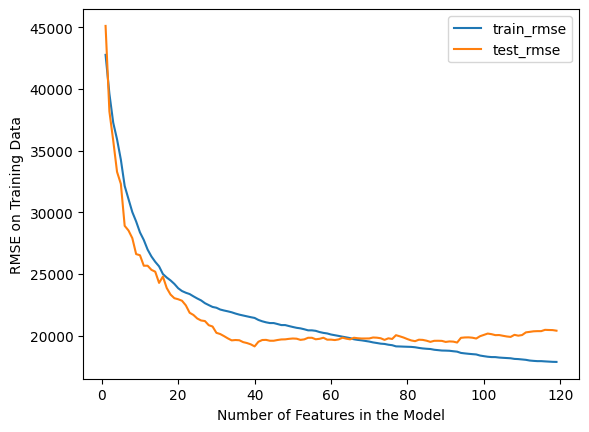

In [43]:
ax = check.plot()

ax.set_xlabel('Number of Features in the Model')
ax.set_ylabel('RMSE on Training Data')

What we can see here is on training data, the RMSE keeps going lower and lower and saturates after a point.

While on the test data, it starts going back up. We can see that in our top 120 features, the test error started increasing after 60 features and after 60 features it started overfitting.

<Strong>This is the perfect example of Overfitting vs Underfitting</Strong>

We clearly see that when we added very few features, the model was underfit, the Training RMSE was high and the model was not predicting well. As we kept adding more and more features, we fed more and more data to the model and it kept learning more about it. But, there came a point where it started memorising the data. In this case, our RMSE on Training Data went lower and lower but our Cross Validation FAILED.

Which means that the model memorised the data and did not actually work on new data. This is overfitting.

In order to remove overfitting, we ran Backward Selection Model.

And, we are done!


# Final Model

Now, basis what we have learnt, let's summarise what all we need to do to now to predict on Test Data.

1. Encode the Categorical Columns we had selected
2. Fill NULL Values in Numerical Columns with Mean
3. Keep only the 80 Features we have decided to use for the model after Forward and Backward Selection
4. If we encounter New Features in the Training Data or Missing Features in Training Data, we will remove or add Features with null values.
4. Predict the Output on Training Data!

<Strong>The Final Model that we selected, was a Lineart Regression Model, where was had Encoded Categorical Columns, even Year columns, filled NULL values in numerical columns with their mean and Only used the features we had found useful in MINIMISING THE TRAINING RMSE WHILE MAXIMISING THE CROSS VALIDATION SCORE to predict the best results on the Testing Data Set.</Strong>

Note:
THE OUTPUT OF THIS MODEL IS FED IN THE LEADERBOARD WITH THE NAME : Santoshtest and RMSE: 20009



In [191]:
import pandas as pd
import numpy as np
import pickle

# pickle.dump(clf , open('housingprediction.pk1' , 'wb'))

df = pd.read_csv('/kaggle/input/housing-data-grade/Housing_Data_Test.csv')

del df['Id']

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

list_of_columns = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                   'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','GarageYrBlt',
                   'MiscFeature','SaleType','SaleCondition','YearBuilt','YearRemodAdd','YrSold','LotShape','Utilities','LandSlope','ExterQual','ExterCond',
                   'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','CentralAir','Functional','FireplaceQu','GarageQual',
                   'GarageCond','PoolQC','GarageFinish','PavedDrive','Fence'
                  ]

for i in list_of_columns:
    a = pd.DataFrame(enc.fit_transform(df[[i]]).toarray())
    a.columns = enc.get_feature_names_out()
    df = df.join(a)
    del df[i]

for i in df.columns:
    if (len(df[df[i].isnull()].index)/len(df.index)*100>0):
        try:
            df[i] = np.where(df[i].isnull(),df[df[i].notnull()][i].mean(),df[i])
        except:
            df[i] = np.where(df[i].isnull(),df[df[i].notnull()][i].mode()[0],df[i])


from sklearn.linear_model import LinearRegression

# clf1 = pickle.load(open('housingprediction.pk1' , 'rb'))

df = df.drop(columns=[i for i in df.columns if i not in score_results])
df = df.drop(columns=[i for i in df.columns if i in back])
add = [i for i in score_results if (i not in df.columns)&(i not in back)]
df = df.join(pd.DataFrame(columns=add))

prediction = clf1.predict(df)

In [192]:
prediction

array([182419.93858549, 167157.86700172, 115689.4512948 , 135277.63651302,
       129505.73170987, 252781.85999895,  76349.79723696, 165590.17947754,
       146112.26094141, 150525.45423042, 142059.88566219, 292642.20614893,
       269928.64056455, 166783.62859341, 153564.59786487, 396504.5283203 ,
       113711.8027509 , 172234.37747574, 209020.29543228,  81225.69130506,
       125400.27900351, 190606.25188831, 168372.39182465, 176909.39330015,
       126176.65442957, 109950.54013232, 192436.45716875, 176426.54558548,
       184724.80108445, 132190.10114926, 116482.73263542, 142018.70253645,
       313948.79239285, 215854.80716371, 164761.70270412, 176273.1175889 ,
       106984.45748604, 131384.24150926, 218608.48740465, 215949.6943883 ,
       156065.34325563, 161912.31665652, 196197.428702  , 121842.91396747,
       127061.90659386, 107610.40972983, 132185.46071538, 210488.61730937,
       276278.77591672, 155828.2647314 , 228537.68866532, 130970.13741508,
       120616.36597437, 2